引入第三方包

In [9]:
from captcha.image import ImageCaptcha
import  random
import  numpy as np
import  tensorflow.gfile as gfile
import matplotlib.pyplot as plt
import  PIL.Image as Image


In [2]:
NUMBER = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
LOWERCASE = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
            'v', 'w', 'x', 'y', 'z']
UPPERCASE = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
           'V', 'W', 'X', 'Y', 'Z']

CAPTCHA_CHARSET = NUMBER   # 验证码字符集
CAPTCHA_LEN = 4            # 验证码长度
CAPTCHA_HEIGHT = 60        # 验证码高度
CAPTCHA_WIDTH = 160        # 验证码宽度



In [4]:
TRAIN_DATASET_SIZE=5000
TEST_DATASET_SIZE=1000
TRAIN_DATA_DIR='./train_data/'
TEST_DATA_DIR='./test-data/'



In [5]:
def get_random_text(charset=CAPTCHA_CHARSET,length=CAPTCHA_LEN):
    text=[random.choice(charset) for _ in range(length)]
    return ''.join(text)

def create_captcha_dataset(size=100,data_dir='./data/',height=60,width=160,image_format='.png'):
    if(gfile.Exists(data_dir)):
        gfile.DeleteRecursively(data_dir)
    gfile.MakeDirs(data_dir)
    captcha=ImageCaptcha(width,height)

    for _ in range(size):
        text=get_random_text(CAPTCHA_CHARSET,CAPTCHA_LEN)
        captcha.write(text,data_dir+text+image_format)
    return None


In [6]:
create_captcha_dataset(TRAIN_DATASET_SIZE, TRAIN_DATA_DIR)

create_captcha_dataset(TEST_DATASET_SIZE, TEST_DATA_DIR)

In [8]:
def gen_captcha_dataset(size=100,
                        height=60,
                        width=160,
                        image_format='.png'):

    # 创建 ImageCaptcha 实例 captcha
    captcha = ImageCaptcha(width=width, height=height)

    # 创建图像和文本数组
    images, texts = [None]*size, [None]*size
    for i in range(size):
        # 生成随机的验证码字符
        texts[i] = get_random_text(CAPTCHA_CHARSET, CAPTCHA_LEN)
        # 使用 PIL.Image.open() 识别新生成的验证码图像
        # 然后，将图像转换为形如(CAPTCHA_WIDTH, CAPTCHA_HEIGHT, 3) 的 Numpy 数组
        images[i] = np.array(Image.open(captcha.generate(texts[i])))

    return images, texts
images, texts = gen_captcha_dataset()

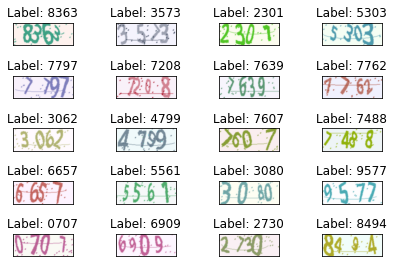

In [13]:
plt.figure()
for i in range(20):
    plt.subplot(5,4,i+1) # 绘制前20个验证码，以5行4列子图形式展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(images[i]) #显示图片
    plt.title("Label: {}".format(texts[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
plt.show()


[[[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [254 242 238]
  [254 242 238]
  [254 242 238]]

 [[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [254 242 238]
  [254 242 238]
  [254 242 238]]

 [[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [254 242 238]
  [254 242 238]
  [254 242 238]]

 ...

 [[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [254 242 238]
  [254 242 238]
  [254 242 238]]

 [[254 242 238]
  [254 242 238]
  [238 235 230]
  ...
  [254 242 238]
  [254 242 238]
  [254 242 238]]

 [[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [254 242 238]
  [254 242 238]
  [254 242 238]]]
